In [1]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import random as rn
import numpy as np
import tensorflow as tf

from tqdm import tqdm
import heapq
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df_baseline = pd.read_csv('vgg/baseline_vgg.csv')
df_glove = pd.read_csv('vgg/baseline_vgg_glove.csv')
df_bert = pd.read_csv('vgg/baseline_vgg_bert.csv')
df_attn = pd.read_csv('vgg/coattention.csv')
df_q_attn = pd.read_csv('vgg/question_attention.csv')
df_im_attn = pd.read_csv('vgg/image_attention.csv')

In [3]:
df_baseline_r = pd.read_csv('resnet/baseline_resnet.csv')
df_glove_r = pd.read_csv('resnet/baseline_resnet_glove.csv')
df_bert_r = pd.read_csv('resnet/baseline_resnet_bert.csv')
df_attn_r = pd.read_csv('resnet/coattention.csv')
df_q_attn_r = pd.read_csv('resnet/question_attention.csv')
df_im_attn_r = pd.read_csv('resnet/image_attention.csv')

VGG19 only models

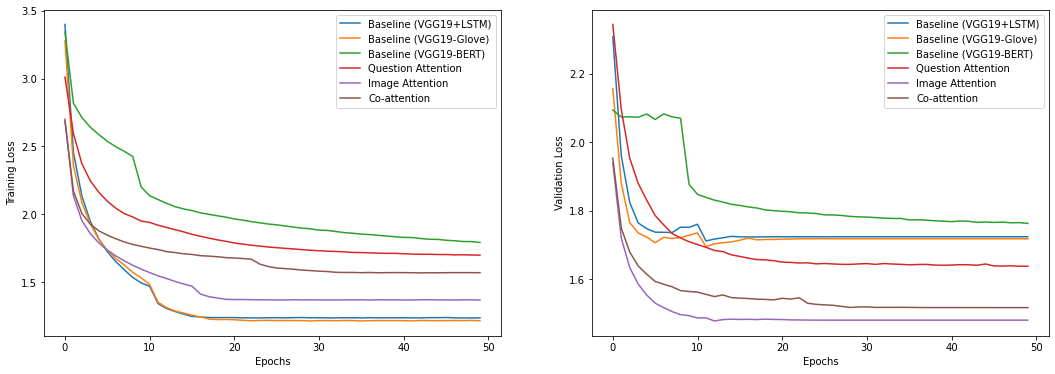

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(df_baseline['loss'])
ax1.plot(df_glove['loss'])
ax1.plot(df_bert['loss'])
ax1.plot(df_q_attn['loss'])
ax1.plot(df_im_attn['loss'])
ax1.plot(df_attn['loss'])
ax1.legend(['Baseline (VGG19+LSTM)', 'Baseline (VGG19-Glove)', 'Baseline (VGG19-BERT)', 'Question Attention', 'Image Attention', 'Co-attention'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
# plt.show()

ax2.plot(df_baseline['val_loss'])
ax2.plot(df_glove['val_loss'])
ax2.plot(df_bert['val_loss'])
ax2.plot(df_q_attn['val_loss'])
ax2.plot(df_im_attn['val_loss'])
ax2.plot(df_attn['val_loss'])
ax2.legend(['Baseline (VGG19+LSTM)', 'Baseline (VGG19-Glove)', 'Baseline (VGG19-BERT)', 'Question Attention', 'Image Attention', 'Co-attention'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss')
plt.show()

ResNet only models


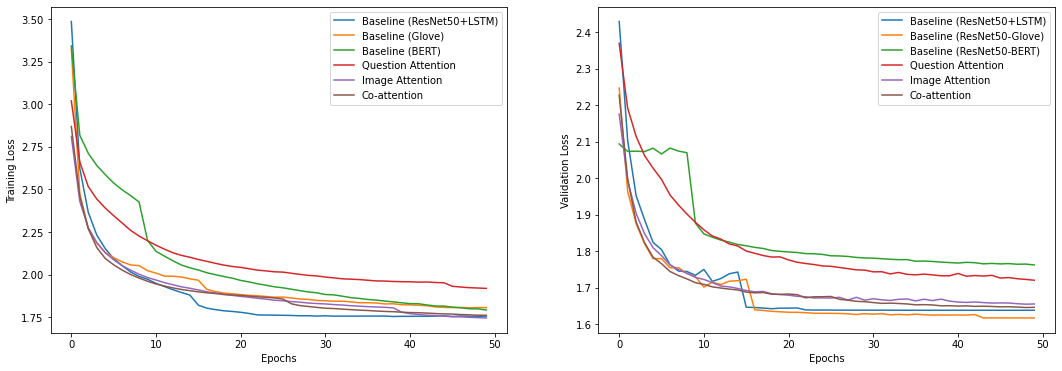

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(df_baseline_r['loss'])
ax1.plot(df_glove_r['loss'])
ax1.plot(df_bert_r['loss'])
ax1.plot(df_q_attn_r['loss'])
ax1.plot(df_im_attn_r['loss'])
ax1.plot(df_attn_r['loss'])
ax1.legend(['Baseline (ResNet50+LSTM)', 'Baseline (Glove)', 'Baseline (BERT)', 'Question Attention', 'Image Attention', 'Co-attention'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
# plt.show()

ax2.plot(df_baseline_r['val_loss'])
ax2.plot(df_glove_r['val_loss'])
ax2.plot(df_bert_r['val_loss'])
ax2.plot(df_q_attn_r['val_loss'])
ax2.plot(df_im_attn_r['val_loss'])
ax2.plot(df_attn_r['val_loss'])
ax2.legend(['Baseline (ResNet50+LSTM)', 'Baseline (ResNet50-Glove)', 'Baseline (ResNet50-BERT)', 'Question Attention', 'Image Attention', 'Co-attention'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss')
plt.show()

All models

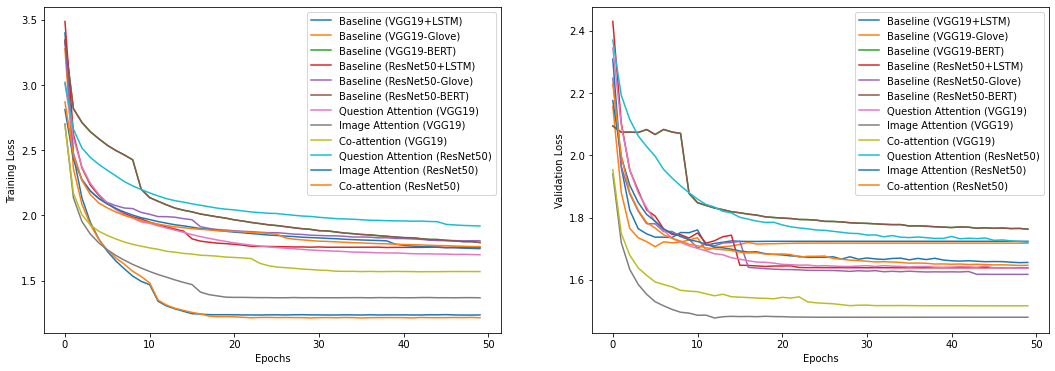

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(df_baseline['loss'])
ax1.plot(df_glove['loss'])
ax1.plot(df_bert['loss'])

ax1.plot(df_baseline_r['loss'])
ax1.plot(df_glove_r['loss'])
ax1.plot(df_bert_r['loss'])

ax1.plot(df_q_attn['loss'])
ax1.plot(df_im_attn['loss'])
ax1.plot(df_attn['loss'])

ax1.plot(df_q_attn_r['loss'])
ax1.plot(df_im_attn_r['loss'])
ax1.plot(df_attn_r['loss'])

ax1.legend(['Baseline (VGG19+LSTM)', 'Baseline (VGG19-Glove)', 'Baseline (VGG19-BERT)', 
            'Baseline (ResNet50+LSTM)', 'Baseline (ResNet50-Glove)', 'Baseline (ResNet50-BERT)',
            'Question Attention (VGG19)', 'Image Attention (VGG19)', 'Co-attention (VGG19)',
           'Question Attention (ResNet50)', 'Image Attention (ResNet50)', 'Co-attention (ResNet50)'])

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
# plt.show()

ax2.plot(df_baseline['val_loss'])
ax2.plot(df_glove['val_loss'])
ax2.plot(df_bert['val_loss'])

ax2.plot(df_baseline_r['val_loss'])
ax2.plot(df_glove_r['val_loss'])
ax2.plot(df_bert_r['val_loss'])

ax2.plot(df_q_attn['val_loss'])
ax2.plot(df_im_attn['val_loss'])
ax2.plot(df_attn['val_loss'])

ax2.plot(df_q_attn_r['val_loss'])
ax2.plot(df_im_attn_r['val_loss'])
ax2.plot(df_attn_r['val_loss'])

ax2.legend(['Baseline (VGG19+LSTM)', 'Baseline (VGG19-Glove)', 'Baseline (VGG19-BERT)',
            'Baseline (ResNet50+LSTM)', 'Baseline (ResNet50-Glove)', 'Baseline (ResNet50-BERT)',
            'Question Attention (VGG19)', 'Image Attention (VGG19)', 'Co-attention (VGG19)',
            'Question Attention (ResNet50)', 'Image Attention (ResNet50)', 'Co-attention (ResNet50)'])

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss')
plt.show()

In [7]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

# ax1.plot(df_baseline_r['loss'], 'b-')
# ax1.plot(df_glove_r['loss'], 'r-')
# ax1.plot(df_bert_r['loss'], 'g-')
# ax1.plot(df_baseline_r['val_loss'], 'b--')
# ax1.plot(df_glove_r['val_loss'], 'r--')
# ax1.plot(df_bert_r['val_loss'], 'g--')
# ax1.legend(['VGG - train', 'VGG-Glove - train', 'VGG-BERT - train', 'VGG - val', 'VGG-Glove - val', 'VGG-BERT - val'])
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# # plt.show()

# ax2.plot(df_q_attn_r['loss'], 'b-')
# ax2.plot(df_im_attn_r['loss'], 'r-')
# # ax2.plot(df_attn_r['loss'], 'g-')
# ax2.plot(df_q_attn_r['val_loss'], 'b--')
# ax2.plot(df_im_attn_r['val_loss'], 'r--')
# # ax2.plot(df_attn_r['val_loss'], 'g--')
# ax2.legend(['Question Attention (train)', 'Image Attention (train)', 'Co-attention (train)', 'Question Attention (val)', 'Image Attention (val)', 'Co-attention (val)'])
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Validation Loss')
# plt.show()

In [8]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

# ax1.plot(df_baseline['loss'], 'b-')
# ax1.plot(df_glove['loss'], 'r-')
# ax1.plot(df_bert['loss'], 'g-')
# ax1.plot(df_baseline['val_loss'], 'b--')
# ax1.plot(df_glove['val_loss'], 'r--')
# ax1.plot(df_bert['val_loss'], 'g--')
# ax1.legend(['VGG+LSTM - train', 'VGG-Glove - train', 'VGG-BERT - train', 'VGG - val', 'VGG-Glove - val', 'VGG-BERT - val'])
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# # plt.show()

# ax2.plot(df_q_attn['loss'], 'b-')
# ax2.plot(df_im_attn['loss'], 'r-')
# ax2.plot(df_attn['loss'], 'g-')
# ax2.plot(df_q_attn['val_loss'], 'b--')
# ax2.plot(df_im_attn['val_loss'], 'r--')
# ax2.plot(df_attn['val_loss'], 'g--')
# ax2.legend(['Question Attention (train)', 'Image Attention (train)', 'Co-attention (train)', 'Question Attention (val)', 'Image Attention (val)', 'Co-attention (val)'])
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Validation Loss')
# plt.show()